- [1. Import Packages](#1)
- [2. Assembling Dataset](#2)
- [3. Model Training](#3)

## 1. Import Packages <a id='1'></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 2. Assembling Dataset <a id='2'></a>

In [10]:
all_features_path = '/Users/liqingyang/Documents/GitHub/variance_prediction/data/cleaned_data/btc_1d_engineered_selected_features.csv'
all_features = pd.read_csv(all_features_path)
all_features['7_day_pre_1'] = all_features['7_day_vol'].shift(1)
all_features['7_day_pre_2'] = all_features['7_day_vol'].shift(2)
all_features['7_day_pre_3'] = all_features['7_day_vol'].shift(3)
all_features = all_features.dropna()

In [11]:
np.random.seed(0)
features = all_features[['close', 'Volume BTC', 'Volume USD', '5_day_vol',
                        'rsi_14_over_30', 'rsi_7_over_14', 'vol_ratio_30_over_150', '7_day_vol', 
                        '7_day_pre_1', '7_day_pre_2', '7_day_pre_3']]
target = all_features['target'].to_numpy().reshape(-1, 1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, shuffle=False, random_state=0)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"Coefficient: {lr.coef_[0][0]}")
print(f"Intercept: {lr.intercept_[0]}")

y_pred = lr.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Coefficient: 0.00023603477660556546
Intercept: 0.03380224477910377
Mean Squared Error: 3.235389270840344e-05
R-squared: 0.8355388223949332


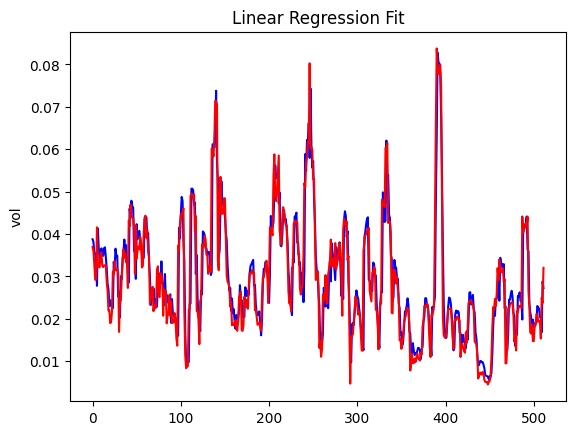

In [22]:
plt.plot(y_pred, color='blue')  # regression line
plt.plot(y_test, color='red')
plt.ylabel("vol")
plt.title("Linear Regression Fit")
plt.show()


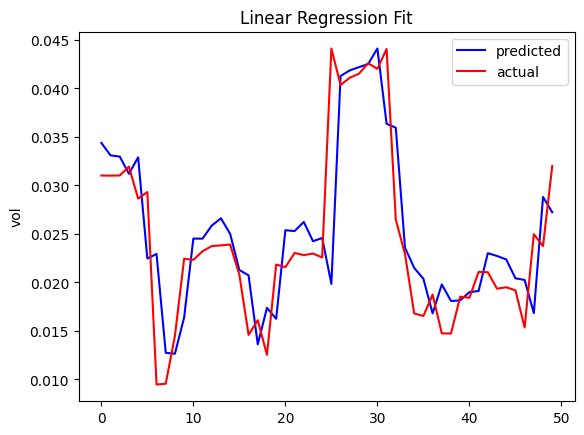

In [23]:
plt.plot(y_pred[-50:], color='blue', label='predicted')  # regression line
plt.plot(y_test[-50:], color='red', label='actual')
plt.ylabel("vol")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()
